In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from lmfit.models import QuadraticModel, LorentzianModel, LinearModel
from lmfit import Model, Minimizer, Parameters, report_fit

import math

def findarg(data, value):
    arg = 0
    for wl in data:
        if wl<value:
            arg = arg + 1
        else:
            return arg
        
    return arg


data = pd.read_csv('sio_2mW_RT.csv')
nvdata = pd.read_csv('nv_data.csv')
gdata = pd.read_csv('gallium_data.csv')

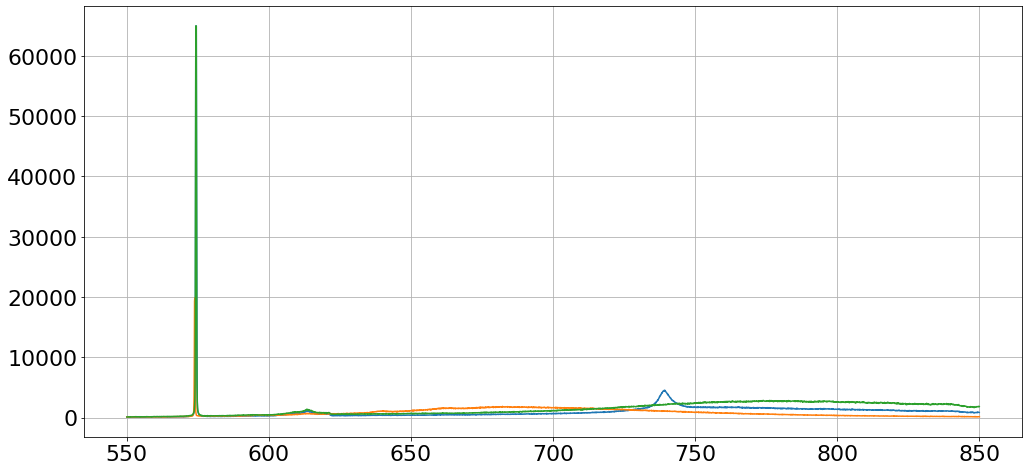

In [2]:
# regionMin = 625.5
# regionMax = 792.5


regionMin = 550
regionMax = 850

argMin = findarg(data['W'], regionMin)
argMax = findarg(data['W'], regionMax)
plt.rcParams.update({'font.size': 22})
cm = 1/2.54 
fig = plt.figure(figsize=(42.69*cm, 20.11*cm))
plt.grid()
plt.plot(data['W'][argMin:argMax],data['I'][argMin:argMax])
plt.plot(nvdata['W'][argMin:argMax],nvdata['I'][argMin:argMax])
plt.plot(gdata['W'][argMin:argMax],gdata['I'][argMin:argMax])

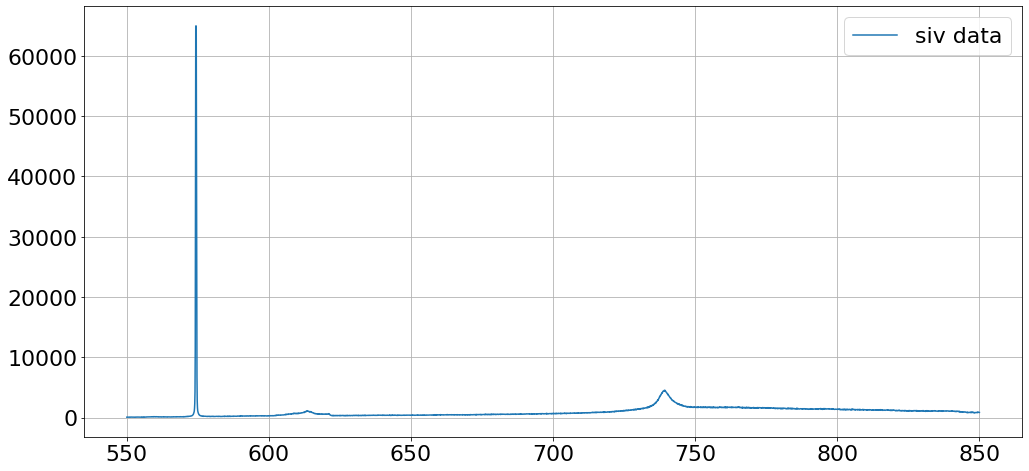

In [3]:
plt.rcParams.update({'font.size': 22})
cm = 1/2.54 
fig = plt.figure(figsize=(42.69*cm, 20.11*cm))
plt.grid()
plt.plot(data['W'][argMin:argMax],data['I'][argMin:argMax],label = 'siv data')
plt.legend()

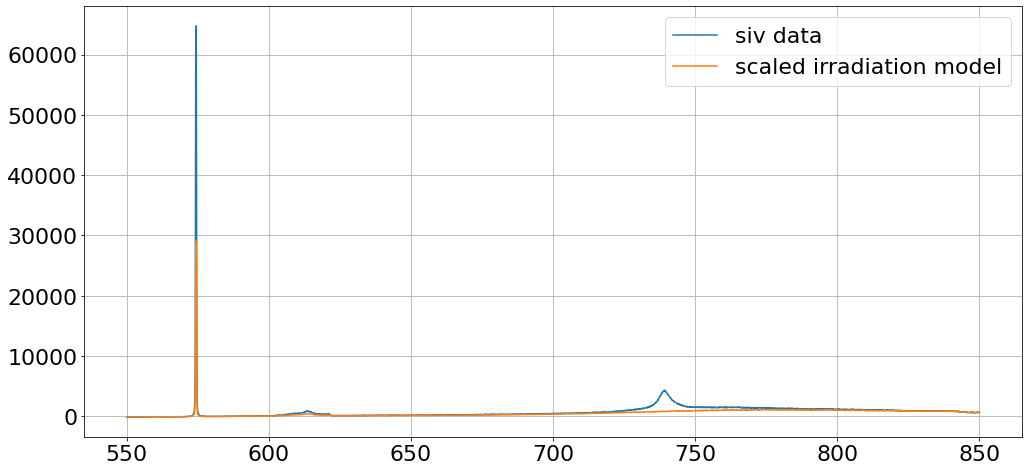

In [4]:
plt.rcParams.update({'font.size': 22})
cm = 1/2.54 
fig = plt.figure(figsize=(42.69*cm, 20.11*cm))
plt.grid()
plt.plot(data['W'][argMin:argMax],data['I'][argMin:argMax]-data['I'][346], label = 'siv data')
plt.plot(gdata['W'][argMin:argMax],(gdata['I'][argMin:argMax]-gdata['I'][346])*0.45, label ='scaled irradiation model')
plt.legend()

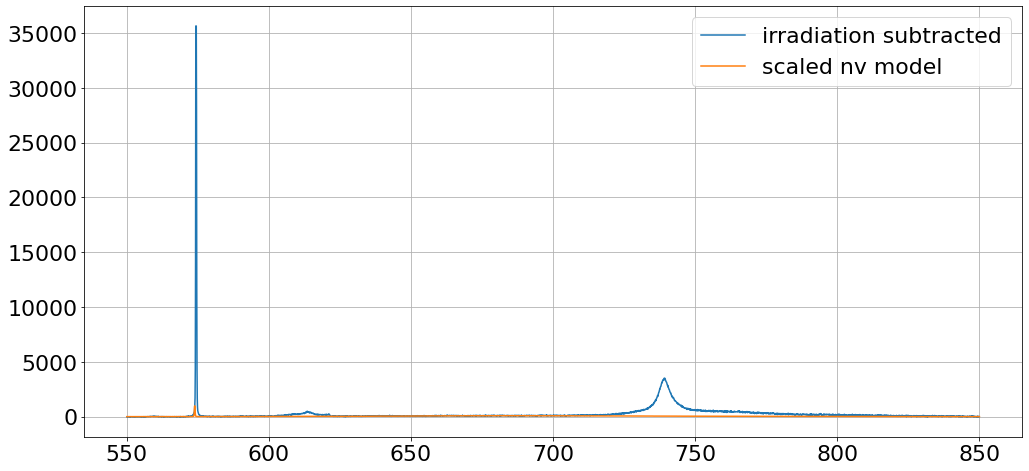

In [5]:
plt.rcParams.update({'font.size': 22})
cm = 1/2.54 
fig = plt.figure(figsize=(42.69*cm, 20.11*cm))
plt.grid()
plt.plot(data['W'][argMin:argMax],data['I'][argMin:argMax]-data['I'][346]-(gdata['I'][argMin:argMax]-gdata['I'][346])*0.45, label ='irradiation subtracted')
plt.plot(nvdata['W'][argMin:argMax],(nvdata['I'][argMin:argMax]-nvdata['I'][346])*0.05, label ='scaled nv model')
plt.legend()

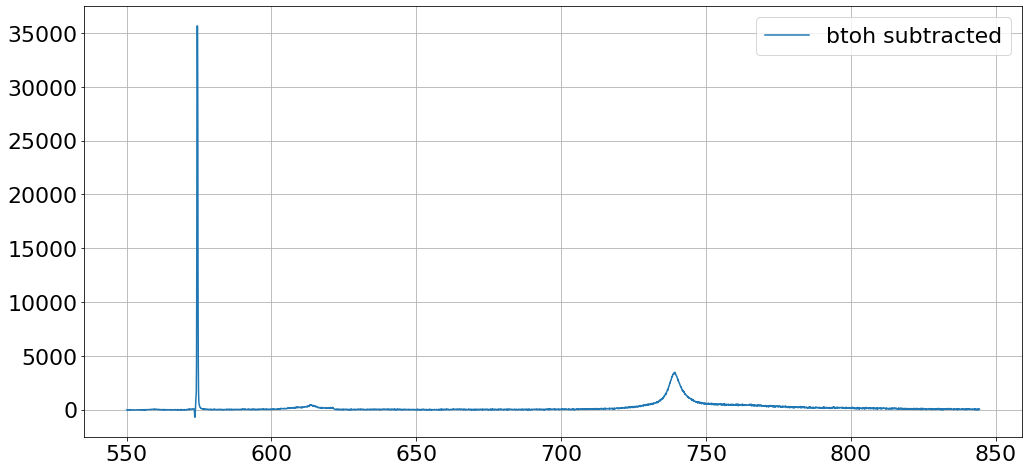

In [6]:
plt.rcParams.update({'font.size': 22})
cm = 1/2.54 
fig = plt.figure(figsize=(42.69*cm, 20.11*cm))
plt.grid()
plt.plot(data['W'][argMin:argMax],data['I'][argMin:argMax]-data['I'][346]-(gdata['I'][argMin:argMax]-gdata['I'][346])*0.45-(nvdata['I'][argMin:argMax]-nvdata['I'][346])*0.05, label ='btoh subtracted')
plt.legend()

In [7]:
siv_model = data['I'][argMin:argMax]-data['I'][346]-(gdata['I'][argMin:argMax]-gdata['I'][346])*0.45-(nvdata['I'][argMin:argMax]-nvdata['I'][346])*0.05

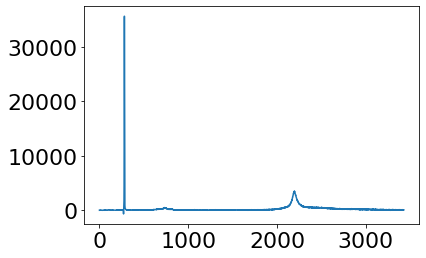

In [8]:
plt.plot(siv_model)

In [9]:
siv_model

0      -27.60
1      -17.70
2      -23.20
3      -12.00
4      -45.75
        ...  
3491      NaN
3492      NaN
3493      NaN
3494      NaN
3495      NaN
Name: I, Length: 3496, dtype: float64

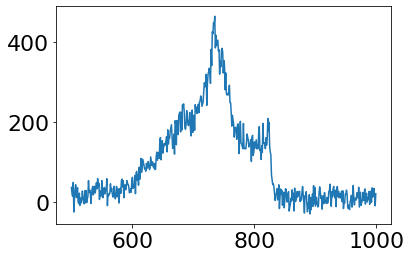

In [10]:
plt.plot(siv_model[500:1000])

In [11]:
df = pd.DataFrame({'W': data['W'][argMin:argMax],'I': siv_model})
df.to_csv('siv_model.csv')